In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error ,r2_score


In [206]:
df=pd.read_csv("Diamod_dataset.csv")

In [208]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# 1. Features

### Carat : Carat weight of the Diamond.
### Cut : Describe cut quality of the diamond Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
### Color : Color of the Diamond.
### Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
### Qualitative Features (Categorical) : Cut, Color, Clarity.

### Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z

In [12]:
df.shape

(53940, 11)

In [14]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 2. Checking null values

In [17]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

## 3. Dropping Unnamed column as we already have Indexes

In [20]:
df.drop(columns="Unnamed: 0",inplace=True)

In [22]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# 4. Analysis on Data 

### 4.1 checking Duplicates

In [26]:
df.duplicated().sum()

146

### 4.2 Dropping duplicates

In [29]:
df.drop_duplicates(inplace=True)

### 4.3 Removing values "0" in X,Y,Z

In [47]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


# 5. Visualisation

In [50]:
df['cut'].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

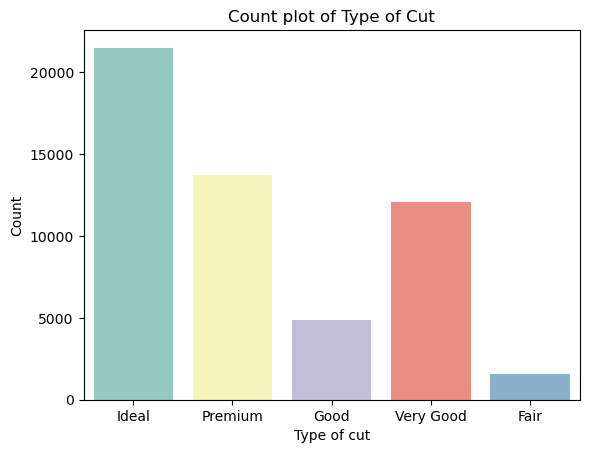

In [46]:
sns.countplot(x='cut', data=df, palette="Set3")
   # Add labels and title
plt.xlabel("Type of cut")
plt.ylabel("Count")
plt.title("Count plot of Type of Cut")

#Show plot
plt.show()

In [52]:
df["color"].value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

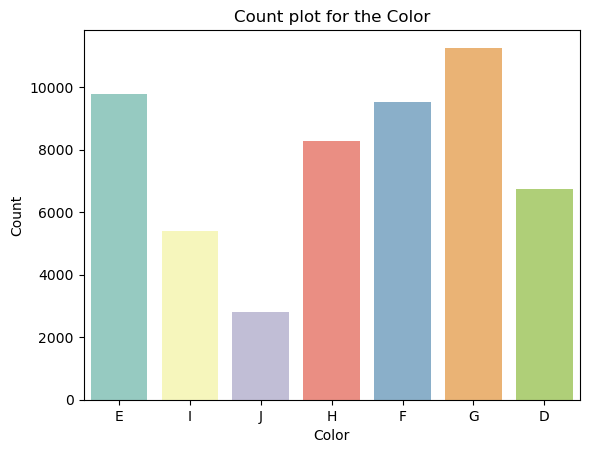

In [56]:
sns.countplot(x="color", data=df, palette="Set3")
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count plot for the Color')
plt.show()

In [74]:
cut_mean_price=df.groupby("cut")["price"].mean().sort_values()
cut_mean_price

cut
Ideal        3462.749953
Good         3919.121039
Very Good    3981.016157
Fair         4341.954318
Premium      4583.501891
Name: price, dtype: float64

Text(0.5, 1.0, 'Comparision of the prices for different cuts')

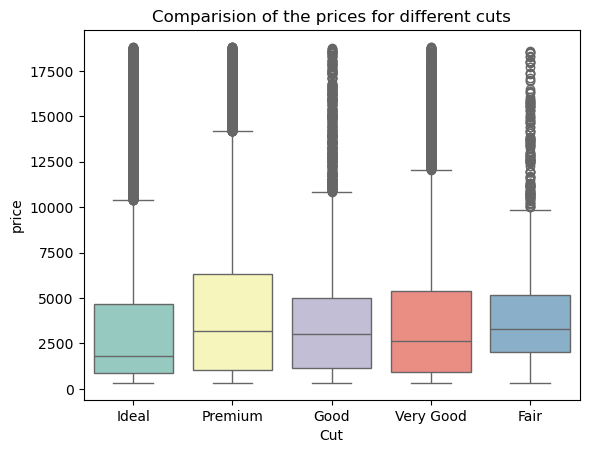

In [68]:
# Comparision of the prices for different cuts
sns.boxplot(x="cut",y="price",data=df,palette="Set3")
plt.xlabel("Cut")
plt.ylabel("price")
plt.title("Comparision of the prices for different cuts")

In [70]:
color_mean_price=df.groupby('color')['price'].mean()
color_mean_price

color
D    3174.441007
E    3079.608020
F    3726.749580
G    4001.352069
H    4482.855174
I    5081.751248
J    5326.415418
Name: price, dtype: float64

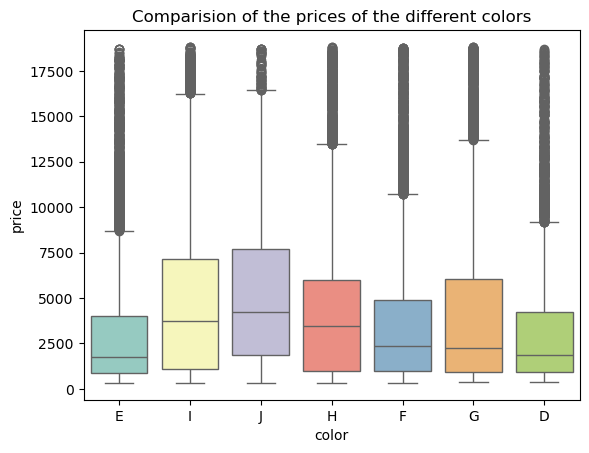

In [72]:
# Comparision of the prices of the different colors
sns.boxplot(x="color",y="price",data=df,palette="Set3")
plt.title("Comparision of the prices of the different colors")
plt.xlabel("color")
plt.ylabel("price")
plt.show()

<Axes: xlabel='carat', ylabel='price'>

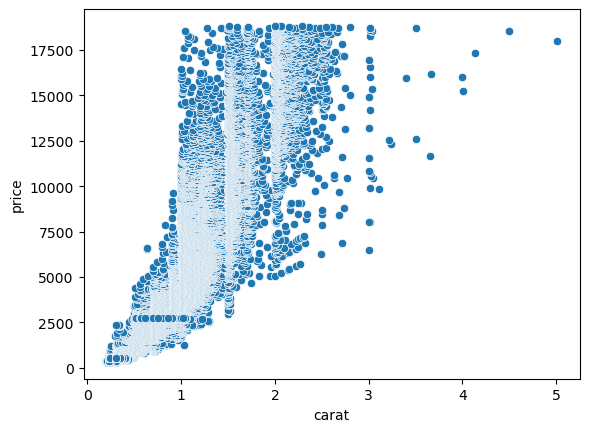

In [78]:
sns.scatterplot(x="carat",y="price",data=df)

In [1]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Print the numerical columns
print(numerical_columns)

corr = df[numerical_columns].corr()
print(corr)

NameError: name 'df' is not defined

<Axes: >

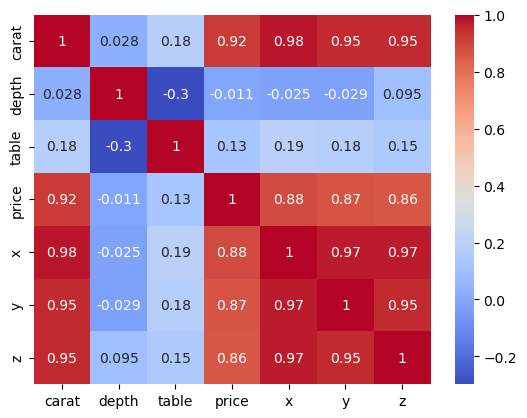

In [88]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

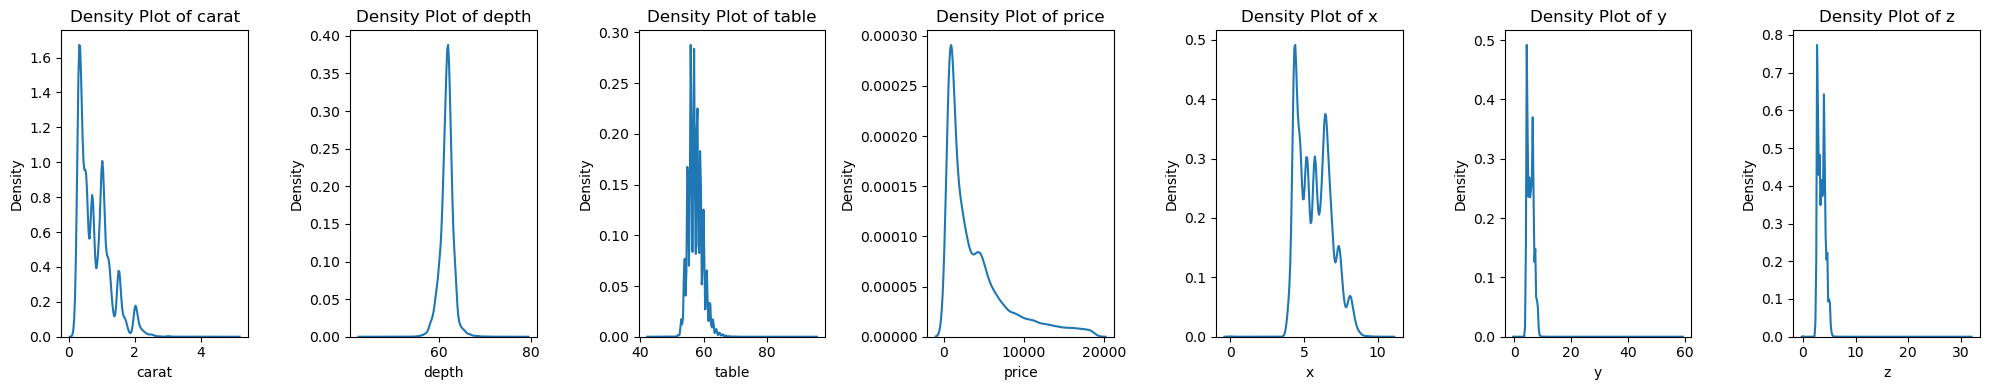

In [90]:
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(20, 4))

# Iterate over columns and plot density plots
for i, column in enumerate(numerical_columns):
    sns.kdeplot(df[column], ax=axs[i])
    axs[i].set_title(f'Density Plot of {column}')

plt.tight_layout()
plt.show()

# Checking Outliers

In [105]:
# Function for Checking Outliers
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

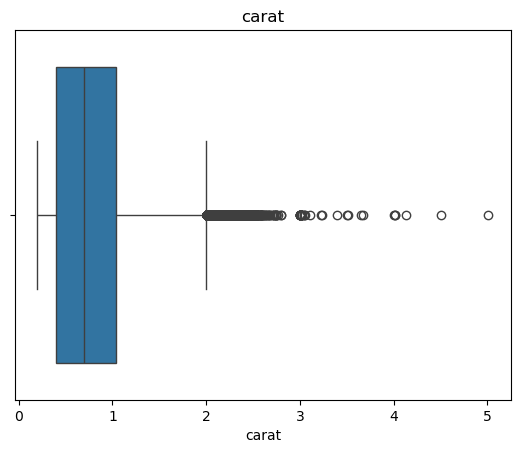

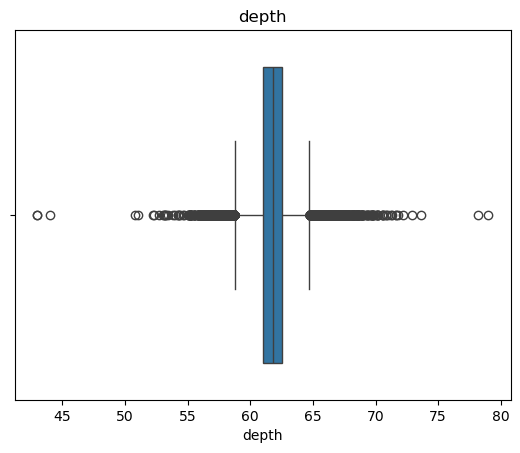

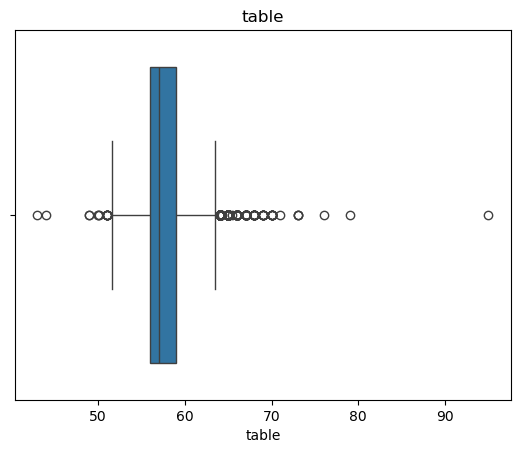

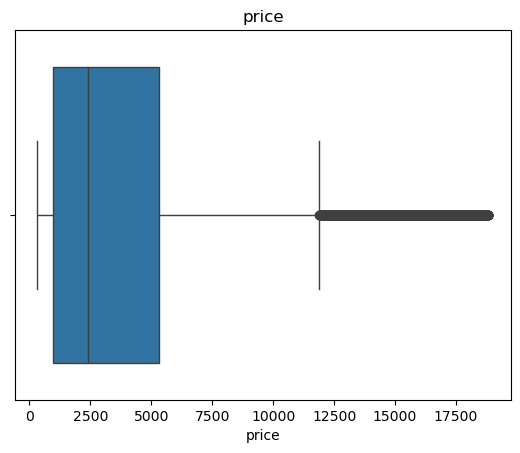

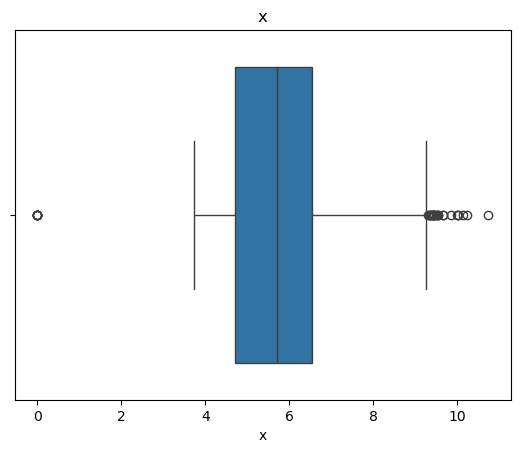

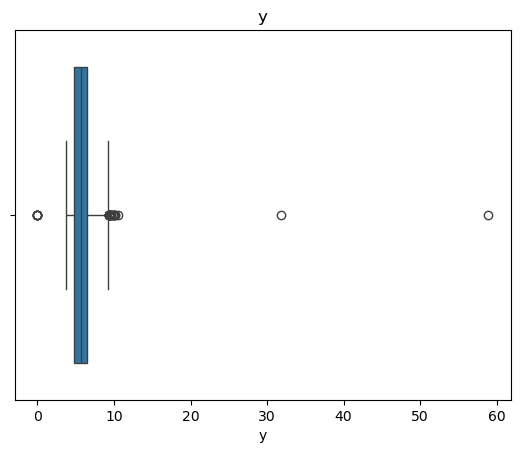

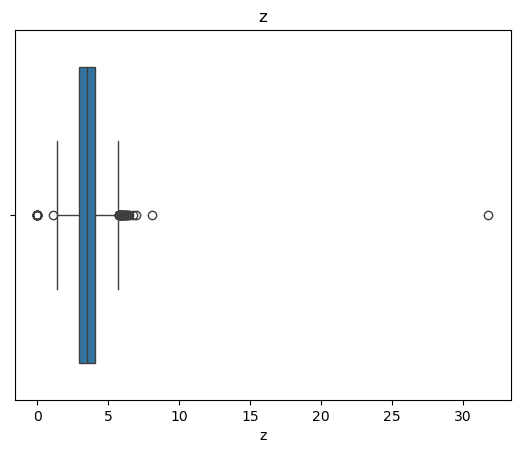

In [107]:
outliers(df)

# Remove Outliers

In [114]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    low = q1 - (1.5 * IQR)
    high = q3 + (1.5 * IQR)
    
    # Clip the values to the lower and upper bounds
    df[column] = np.clip(df[column], low, high)

In [116]:
remove_outliers(df,"carat")
remove_outliers(df,"depth")
remove_outliers(df,"table")
remove_outliers(df,"price")
remove_outliers(df,"x")
remove_outliers(df,"y")
remove_outliers(df,"z")


### Rechecking ouliers after removal

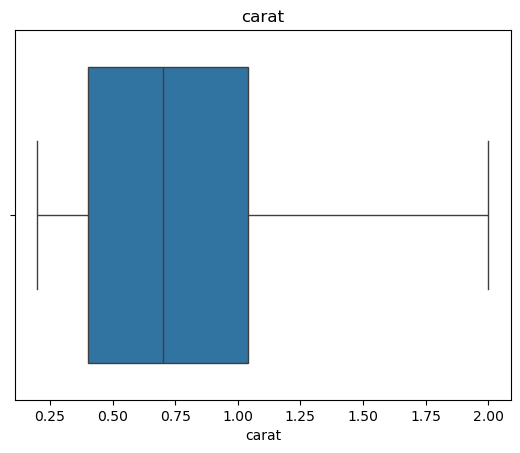

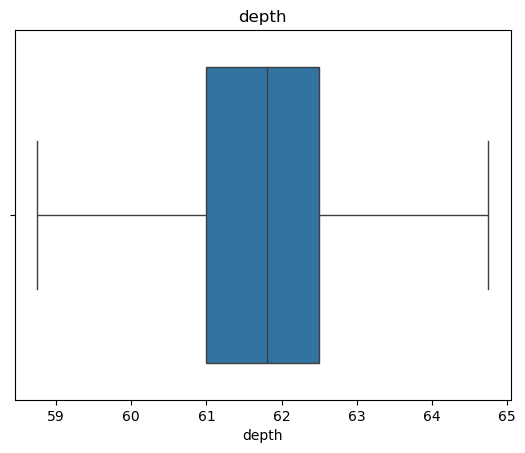

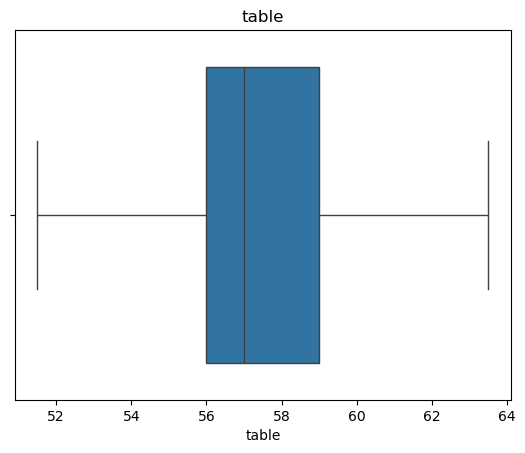

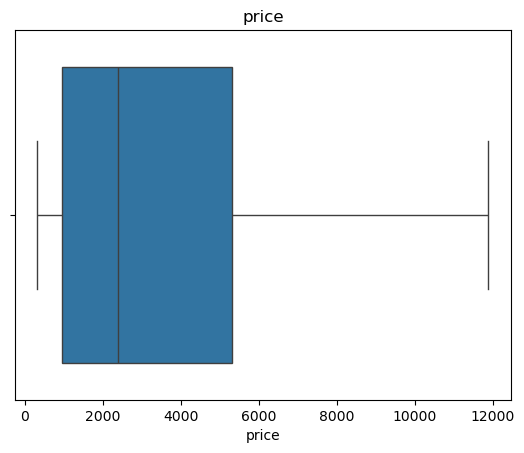

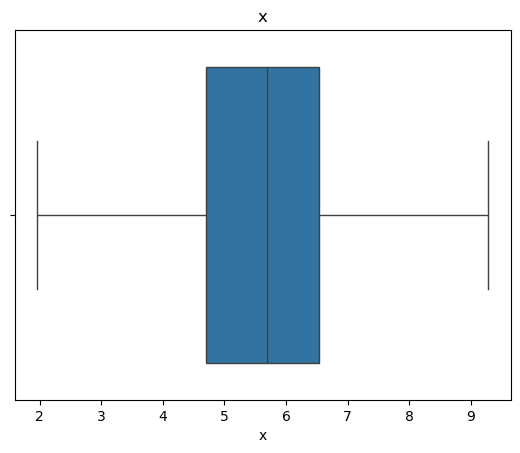

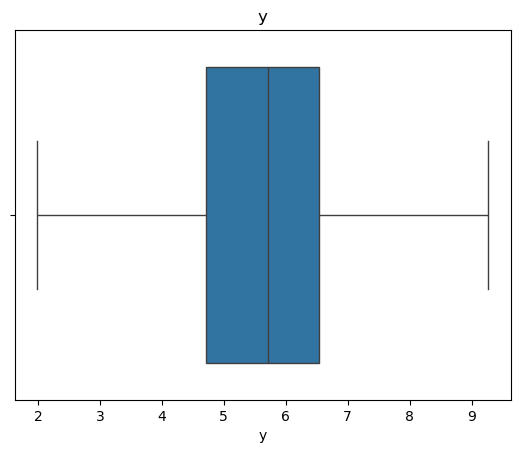

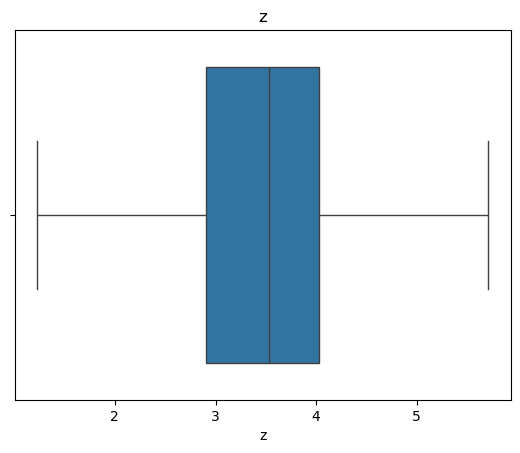

In [119]:
outliers(df)

In [124]:
df1=df.copy()

In [128]:
df.columns
"""'carat', 'depth', 'table', 'x', 'y','z'"""

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# Modelling

In [132]:
y=df1["price"]
x=df1.drop(columns=["price","color","clarity","cut"])

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=88) 

In [190]:
####### Defining Models #####
#######-----------------#####

In [192]:
models={"Linear Regression":LinearRegression(),
        "Decision Tree Regressor":DecisionTreeRegressor(),
        "Random Forest Regression":RandomForestRegressor()}

In [194]:
# Fit models , make predictions and compute MSE
MSE_Results={}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    MSE=mean_squared_error(y_test,y_pred)
    MSE_Results[name]=MSE

## PRINT (MSE) RESULTS
for name,mse in MSE_Results.items():
    print(f"{name}: MSE = {mse}")

## BEST MODEL
BEST_model= min(MSE_Results,key=MSE_Results.get)
print("BEST MODEL IS ",{BEST_model})

Linear Regression: MSE = 1367884.2866409738
Linear Regression: MSE = 1367884.2866409738
Decision Tree Regressor: MSE = 2187171.5326304524
Linear Regression: MSE = 1367884.2866409738
Decision Tree Regressor: MSE = 2187171.5326304524
Random Forest Regression: MSE = 1183944.7519772842
BEST MODEL IS  {'Random Forest Regression'}


In [195]:
# Results dictionary
results = {}

# Iterate through models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R-squared": r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Linear Regression:
MAE: 749.0888065407519
MSE: 1367884.2866409738
R-squared: 0.8852824793407065

Decision Tree Regressor:
MAE: 830.1016546501488
MSE: 2155689.8440712616
R-squared: 0.8192132210031144

Random Forest Regression:
MAE: 645.2876113044938
MSE: 1182709.7941053994
R-squared: 0.90081212529138



In [198]:
# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Print the DataFrame
print(results_df)

                                 MAE           MSE  R-squared
Linear Regression         749.088807  1.367884e+06   0.885282
Decision Tree Regressor   830.101655  2.155690e+06   0.819213
Random Forest Regression  645.287611  1.182710e+06   0.900812
